In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [2]:
df_1 = pd.read_csv('../data/TewheyMPRA/TewheyMPRA_GM12878.csv')
df_1

,ID,chr,pos,allele,seq,log2FoldChange,log2FoldChangeOverControl
0,1:881627:G:A:A:wC,chr1,881627,alt,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,-0.082,-0.047
1,1:881627:G:A:R:wC,chr1,881627,ref,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,0.249,0.083
2,1:891059:C:T:A:wC,chr1,891059,alt,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.830,0.310
3,1:891059:C:T:R:wC,chr1,891059,ref,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.956,0.360
4,1:891945:A:G:A:wC,chr1,891945,alt,CCTCCAGGTGGTATCTGGAGCTCTCCGTATCCTTGTCCCTGGAAAA...,-0.151,-0.074
...,...,...,...,...,...,...,...
286333,9:140374146:G:A:R:wC,chr9,140374146,ref,AGAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTG...,0.202,0.117
286334,9:140374147:C:A:A:wC,chr9,140374147,alt,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.342,0.199
286335,9:140374147:C:A:R:wC,chr9,140374147,ref,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,-0.128,-0.076
286336,9:140530127:T:C:A:wC,chr9,140530127,alt,TTTGGGAGGCCGAGGTGGGTGGATCACGAGGTCAGGAGATCGAGAC...,0.740,0.350


In [3]:
df_2 = pd.read_csv('../data/TewheyMPRA/TewheyMPRA_A549.csv')
df_2

,ID,chr,pos,allele,seq,log2FoldChange,log2FoldChangeOverControl
0,1:881627:G:A:A:wC,chr1,881627,alt,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,-0.159,-0.071
1,1:881627:G:A:R:wC,chr1,881627,ref,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,0.174,0.023
2,1:891059:C:T:A:wC,chr1,891059,alt,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.979,0.250
3,1:891059:C:T:R:wC,chr1,891059,ref,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,1.404,0.371
4,1:891945:A:G:A:wC,chr1,891945,alt,CCTCCAGGTGGTATCTGGAGCTCTCCGTATCCTTGTCCCTGGAAAA...,0.501,0.115
...,...,...,...,...,...,...,...
286333,9:140374146:G:A:R:wC,chr9,140374146,ref,AGAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTG...,1.073,0.292
286334,9:140374147:C:A:A:wC,chr9,140374147,alt,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.446,0.098
286335,9:140374147:C:A:R:wC,chr9,140374147,ref,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.814,0.212
286336,9:140530127:T:C:A:wC,chr9,140530127,alt,TTTGGGAGGCCGAGGTGGGTGGATCACGAGGTCAGGAGATCGAGAC...,1.014,0.307


In [4]:
df = df_1.copy()
df['GM12878_x'] = df_1['log2FoldChange']
df['GM12878_over_control'] = df_1['log2FoldChangeOverControl']

df['A549_x'] = df_2['log2FoldChange']
df['A549_over_control'] = df_2['log2FoldChangeOverControl']

In [7]:
Gosai_MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_my_processed_data_len200.csv')
Gosai_MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.554,0.416,0.442,NaN,-0.288
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-0.704,0.668,0.539,NaN,0.159
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-0.659,1.152,0.205,NaN,1.051
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.391,1.270,0.752,NaN,1.100
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.007,-0.211,0.499,NaN,0.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760696,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,1.381,1.846,1.702,NaN,NaN
760697,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.306,-0.107,-0.080,NaN,NaN
760698,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,0.363,0.261,0.060,NaN,NaN
760699,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,0.395,0.378,-0.030,NaN,NaN


In [9]:
merged_df = pd.merge(df, Gosai_MPRA_df, on=['ID'], how='outer')
merged_df

,ID,chr_x,pos_x,allele_x,seq_x,log2FoldChange,log2FoldChangeOverControl,GM12878_x,GM12878_over_control,A549_x,A549_over_control,seq_y,chr_y,pos_y,ref_allele,alt_allele,allele_y,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116
0,10:100014847:CT:C:R:wC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTGGCACTGACCTGGCTGGGAGATGTCAGAGATGCTGCTGCCCTAA...,chr10,100014847.000,CT,C,ref,OL41_42,GTEx,-0.186,-0.028,-0.277,NaN,-0.174
1,10:100025816:G:A:A:wC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCTGACCCCTCCCACGCTTCCTTTCCAGACTGAAACACTGTCTTCT...,chr10,100025816.000,G,A,alt,OL41_42,GTEx,1.950,1.649,1.808,NaN,1.162
2,10:100025816:G:A:R:wC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCTGACCCCTCCCACGCTTCCTTTCCAGACTGAAACACTGTCTTCT...,chr10,100025816.000,G,A,ref,OL41_42,GTEx,2.045,1.624,1.222,NaN,1.281
3,10:100029561:C:T:A:wC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCAACACAGAGGGTTCGGAAACGTGGGCTCTGCCTGCTGCCAATCA...,chr10,100029561.000,C,T,alt,OL41_42,GTEx,0.443,2.610,2.652,NaN,1.620
4,10:100029561:C:T:R:wC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GCAACACAGAGGGTTCGGAAACGTGGGCTCTGCCTGCTGCCAATCA...,chr10,100029561.000,C,T,ref,OL41_42,GTEx,0.296,3.391,3.403,NaN,2.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765380,Y:2692689:NA:NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TAGCCAGGCTTGCTTATTCTGCTTGCCTGCAGAAGTTTACGAAGCC...,chrY,2692689.000,NaN,NaN,NaN,OL15,OL15,-0.584,3.174,-0.015,NaN,NaN
765381,Y:2693555:NA:NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GAGTGAAACTCCGCCTCAAAAAAATAAAATAAAATAAAATAAAAGA...,chrY,2693555.000,NaN,NaN,NaN,OL15,OL15,0.570,0.617,0.493,NaN,NaN
765382,Y:2693755:NA:NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TAACTTAAATAACATATGCATGTTTTTTGATACTTCGAATTATGCA...,chrY,2693755.000,NaN,NaN,NaN,OL15,OL15,0.093,0.003,-0.238,NaN,NaN
765383,Y:2693955:NA:NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TATGCAAAAATTAATGAAGAGACAGTTATACTACACCTCATGTAAT...,chrY,2693955.000,NaN,NaN,NaN,OL15,OL15,-0.462,-0.460,-0.556,NaN,NaN


0.9961205310890302


<Axes: >

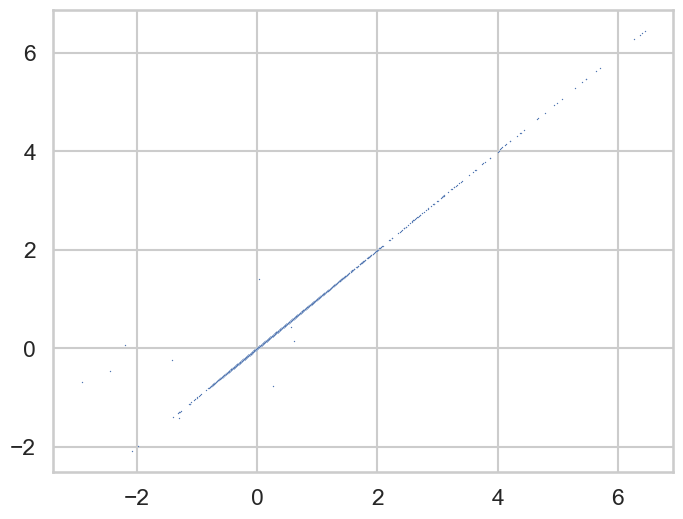

In [11]:
x = np.array(merged_df['A549_x'])
y = np.array(merged_df['A549'])

r, _ = pearson(x, y)
print(r)

sns.scatterplot(x=x[:10000], y=y[:10000], s=1)

In [13]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'A549', 'HCT116', 'GM12878_x']

for cell_type in cell_types:
    x = np.array(merged_df['GM12878_x'])
    y = np.array(merged_df[cell_type])
    r, _ = pearson(x, y)
    print(r)


0.48418960790897764
0.454090217167337
0.4877870286326439
0.5955622879383244
0.5033018104075209


In [12]:
# 各细胞类型的真实活性的相关性

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'A549', 'HCT116', 'GM12878_x']
corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types, dtype=float)
for cell_type in cell_types:
    for cell_type_2 in cell_types:
        # condition = data_split_dict[data_split]
        # df = MPRA_df[condition]
        df = merged_df
        x = df[f'{cell_type}']
        y = df[f'{cell_type_2}']
        r, p = pearson(x, y)
        corr_matrix.loc[cell_type, cell_type_2] = r
print(corr_matrix)
print()












# # for data_split in ['total', 'train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']:
#     corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types, dtype=float)
#     for cell_type in cell_types:
#         for cell_type_2 in cell_types:
#             # condition = data_split_dict[data_split]
#             # df = MPRA_df[condition]
#             df = merged_df
#             x = df[f'{cell_type}']
#             y = df[f'{cell_type_2}']
#             r, p = pearson(x, y)
#             corr_matrix.loc[cell_type, cell_type_2] = r
#     print(data_split)
#     print(corr_matrix)
#     print()
    # plt.figure(figsize=(8, 6), dpi=100)
    # plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)
    # sns.heatmap(
    #     corr_matrix, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=1, 
    #     annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    # plt.xticks(
    #     ticks=np.arange(len(cell_types))+0.5, labels=cell_types, 
    #     rotation=0, fontsize=14)
    # plt.yticks(
    #     ticks=np.arange(len(cell_types))+0.5, labels=cell_types, 
    #     rotation=0, fontsize=14)
    # plt.title(f'Pearson r between cell types', fontsize=20)
    # plt.savefig(f'predict_enhancer_activity/figures/heatmap_pearson_r_{data_split}_activity_vs_activity.png', dpi=400)
    # plt.show()

           K562  HepG2  SK-N-SH  A549  HCT116  GM12878_x
K562      1.000  0.801    0.759 0.724   0.825      0.418
HepG2     0.801  1.000    0.836 0.730   0.879      0.385
SK-N-SH   0.759  0.836    1.000 0.777   0.833      0.425
A549      0.724  0.730    0.777 1.000   0.825      0.512
HCT116    0.825  0.879    0.833 0.825   1.000      0.487
GM12878_x 0.418  0.385    0.425 0.512   0.487      1.000



In [14]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
for cell_type in cell_types:
    x = np.array(merged_df['K562'])
    y = np.array(merged_df[cell_type])
    r, _ = pearson(x, y)
    print(r)

1.0
0.7731423256163322
0.710016757662227
0.7274824567146494
0.8180190686302766
